<a href="https://colab.research.google.com/github/pavansaipendry/Object-recognisation-using-ResNet50/blob/main/CIFAR_10_Object_Recognisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Configuring the path of kaggle.json file

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:35<00:00, 23.4MB/s]
100% 715M/715M [00:35<00:00, 21.0MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [17]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 31.1 MB/s eta 0:00:00


In [19]:
import py7zr

archive = py7zr.SevenZipFile("/content/train.7z", mode = 'r')
archive.extractall()
archive.close()

In [20]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [12]:
labels_df.shape

(50000, 2)

In [13]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [14]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [15]:
label_dict = {"frog":0 ,"truck":1 ,"deer":2,
             "automobile":3 ,"bird": 4 ,"horse":5 , "ship":6,
              "cat" : 7 , "dog":8 , "airplane":9}

labels = [label_dict[i] for i in labels_df['label']]
print(labels)
print(len(labels))

[0, 1, 1, 2, 3, 3, 4, 5, 6, 7, 2, 5, 5, 4, 1, 1, 1, 7, 4, 0, 2, 7, 0, 0, 4, 0, 7, 8, 2, 9, 9, 1, 3, 7, 2, 9, 7, 5, 7, 7, 8, 4, 4, 5, 3, 3, 3, 4, 4, 9, 1, 8, 5, 1, 4, 4, 8, 4, 2, 7, 3, 3, 6, 4, 3, 3, 2, 1, 5, 6, 8, 1, 0, 5, 7, 3, 1, 9, 7, 3, 7, 8, 2, 8, 5, 5, 2, 5, 1, 2, 4, 7, 6, 9, 3, 0, 3, 3, 2, 3, 6, 7, 1, 0, 0, 3, 6, 8, 4, 1, 1, 6, 3, 5, 5, 9, 9, 0, 1, 3, 4, 4, 1, 4, 0, 0, 3, 1, 8, 9, 2, 5, 0, 5, 3, 6, 3, 3, 4, 6, 3, 7, 7, 0, 4, 2, 1, 1, 8, 2, 7, 0, 5, 2, 0, 6, 8, 8, 2, 7, 3, 6, 2, 5, 0, 9, 1, 8, 3, 7, 6, 4, 5, 8, 7, 2, 3, 8, 5, 9, 2, 5, 8, 8, 3, 9, 1, 0, 1, 9, 6, 5, 6, 6, 4, 8, 4, 7, 8, 9, 0, 3, 1, 7, 0, 1, 3, 7, 1, 0, 0, 5, 3, 9, 1, 8, 6, 8, 4, 1, 9, 6, 6, 9, 0, 1, 3, 3, 0, 7, 5, 0, 0, 9, 0, 0, 3, 5, 3, 8, 6, 7, 0, 0, 6, 0, 6, 2, 0, 0, 3, 7, 6, 7, 2, 3, 5, 3, 7, 6, 8, 3, 3, 2, 9, 1, 7, 5, 2, 1, 1, 4, 2, 1, 1, 3, 9, 8, 1, 9, 6, 4, 3, 4, 9, 8, 0, 7, 4, 5, 6, 6, 0, 9, 5, 1, 2, 8, 0, 2, 4, 3, 3, 4, 3, 8, 1, 1, 9, 6, 2, 3, 3, 0, 7, 7, 1, 9, 5, 1, 5, 5, 1, 3, 8, 3, 0, 0, 6, 5, 3, 7, 9, 

In [16]:
id_list = list(labels_df['id'])
print(id_list[-5:])

[49996, 49997, 49998, 49999, 50000]


##### Image Processing - converting images to numpy array

In [22]:
train_data_folder = "/content/train/"

data = [] #take 50k images into 50kimages into numpy arrays into a list

for id in id_list:
    image = Image.open(train_data_folder + str(id) + '.png')

    #convert image to numpyarray
    image_ = np.array(image)
    data.append(image_)

In [23]:
print(len(data))

50000


Convert images list and label list t numpy array

In [24]:
X = np.array(data)
y = np.array(labels)

Train Test Split

In [33]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.1 , random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45000, 32, 32, 3)
(45000,)
(5000, 32, 32, 3)
(5000,)


Normalization - Scale the data. Since the data liesin btn 0-255, now we are converting it to 0-1

In [35]:
X_train_scaled = X_train /255
X_test_scaled = X_test /255

In [36]:
print(X_train_scaled)

[[[[0.07058824 0.04705882 0.09411765]
   [0.08627451 0.0627451  0.10980392]
   [0.10588235 0.08235294 0.12941176]
   ...
   [0.10196078 0.0745098  0.11764706]
   [0.05490196 0.04313725 0.07058824]
   [0.04313725 0.03921569 0.0627451 ]]

  [[0.07058824 0.04705882 0.09411765]
   [0.08235294 0.05882353 0.10588235]
   [0.09803922 0.0745098  0.12156863]
   ...
   [0.10588235 0.09019608 0.1254902 ]
   [0.08235294 0.08235294 0.10588235]
   [0.06666667 0.07058824 0.09411765]]

  [[0.09019608 0.06666667 0.11372549]
   [0.08627451 0.0627451  0.10980392]
   [0.07843137 0.05490196 0.10196078]
   ...
   [0.11372549 0.10980392 0.14509804]
   [0.09803922 0.10196078 0.1254902 ]
   [0.08235294 0.09803922 0.11764706]]

  ...

  [[0.17254902 0.09411765 0.1372549 ]
   [0.18823529 0.10196078 0.14901961]
   [0.21568627 0.12156863 0.16862745]
   ...
   [0.50980392 0.51372549 0.62352941]
   [0.41176471 0.40784314 0.49803922]
   [0.25490196 0.23529412 0.32156863]]

  [[0.09803922 0.06666667 0.10588235]
   [0.1

### Building a Neural Network

In [29]:
import tensorflow as tf
from tensorflow import keras

setting up the layers of the Neural Network

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(64 , activation='relu'),
    keras.layers.Dense(10 , activation='softmax')
])

Compile the Neural Network

In [38]:
model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['acc'])

Training the Neural Network

In [39]:
model.fit(X_train_scaled , y_train , validation_split=0.1 , epochs=10)

Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2429 - loss: 2.0656 - val_acc: 0.2922 - val_loss: 1.8968
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3353 - loss: 1.8564 - val_acc: 0.3473 - val_loss: 1.8159
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3551 - loss: 1.8029 - val_acc: 0.3344 - val_loss: 1.8248
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3603 - loss: 1.7821 - val_acc: 0.3516 - val_loss: 1.7887
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3779 - loss: 1.7439 - val_acc: 0.3620 - val_loss: 1.7618
Epoch 6/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3768 - loss: 1.7427 - val_acc: 0.3724 - val_loss: 1.7521
Epoch 7/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3836 - loss: 1.7265 - val_acc: 0.3591 - val_loss: 1.7660
Epoch 8/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3865 - loss: 1.7148 - val_acc: 0.3613 - val_loss: 1.7653
Epoch 9/10
1266/1266 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [40]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#optimizers
from tensorflow.keras import optimizers

In [41]:
convolutional_base = ResNet50(weights='imagenet', #contains 14M of images, contains lot of classes
                            include_top = False, # it will drop the final layer
                            input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [42]:
model = models.Sequential() #we are going to stackup all the layers
model.add(layers.UpSampling2D((2,2))) #32*32 - > 64
model.add(layers.UpSampling2D((2,2))) #64*64 ->128
model.add(layers.UpSampling2D((2,2))) #128*128 -> 256. Since ResNet take 256 of image size

model.add(convolutional_base)

model.add(layers.Flatten()) #converts matrix into a vector so all the values into a single column


model.add(layers.BatchNormalization())
model.add(layers.Dense(128 , activation = 'relu'))
model.add(layers.Dropout(0.5)) #making sure to reduce the risk of overfitting

model.add(layers.BatchNormalization())
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(10 , activation= 'softmax'))

In [47]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [48]:
history = model.fit(X_train_scaled , y_train , validation_split=0.1 , epochs=10)

Epoch 1/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 544s 383ms/step - acc: 0.3355 - loss: 2.0165 - val_acc: 0.7804 - val_loss: 0.7805
Epoch 2/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 495s 358ms/step - acc: 0.6851 - loss: 1.0239 - val_acc: 0.8844 - val_loss: 0.4734
Epoch 3/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 494s 352ms/step - acc: 0.8087 - loss: 0.7190 - val_acc: 0.9196 - val_loss: 0.3342
Epoch 4/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 502s 352ms/step - acc: 0.8741 - loss: 0.5447 - val_acc: 0.9318 - val_loss: 0.2724
Epoch 5/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 452s 357ms/step - acc: 0.9146 - loss: 0.4166 - val_acc: 0.9344 - val_loss: 0.2547
Epoch 6/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 495s 352ms/step - acc: 0.9422 - loss: 0.3205 - val_acc: 0.9342 - val_loss: 0.2383
Epoch 7/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 502s 351ms/step - acc: 0.9551 - loss: 0.2640 - val_acc: 0.9396 - val_loss: 0.2135
Epoch 8/10
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 452s 357ms/step - acc: 0.9657 - loss: 0.2138 - val_acc: 0.9436 - val_loss: 0.2058
Epoch 9/

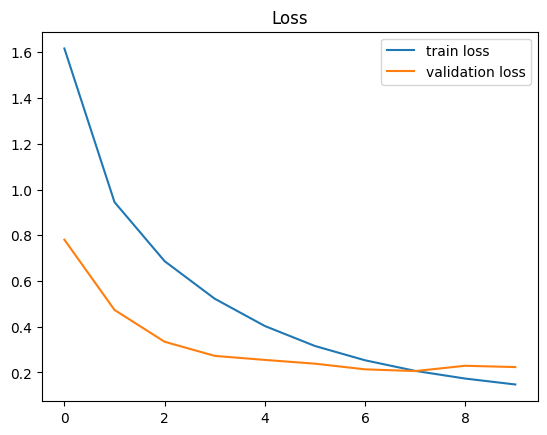

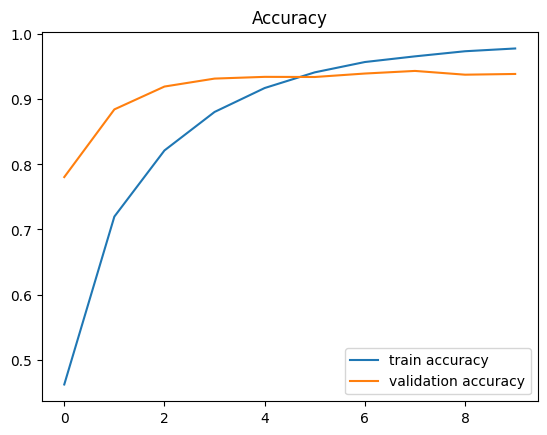

In [50]:
h = history

#plt the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.title('Loss')
plt.legend()
plt.show()

#plt the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()